# SWMAL Exercise

## Pipelines

We now try building af ML pipeline. The data for this exercise is the same as in L01, meaning that the OECD data from the 'intro.ipynb' have been save into a Python 'pickle' file. 

The pickle library is a nifty data preservation method in Python, and from L01 the tuple `(X, y)` have been stored to the pickle file `itmal_l01_data.pkl', try reloading it..

In [1]:
%matplotlib inline

import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def LoadDataFromL01():
    filename = os.path.join("../UndervisningsGit/GITMAL/datasets/pipeline/itmal_l01_data.pkl")
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


###  Revisiting the problem with the MLP

Using the MLP for the QECD data in Qd) from `intro.ipynb` produced a negative $R^2$, meaning that it was unable to fit the data, and the MPL model was actually _worse_ than the naive $\hat y$ (mean value of y).

Let's just revisit this fact. When running the next cell you should now see an OK $~R^2_{lin.reg}~$ score and a negative $~R^2_{mlp}~$ score..

The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=-8.55

OK


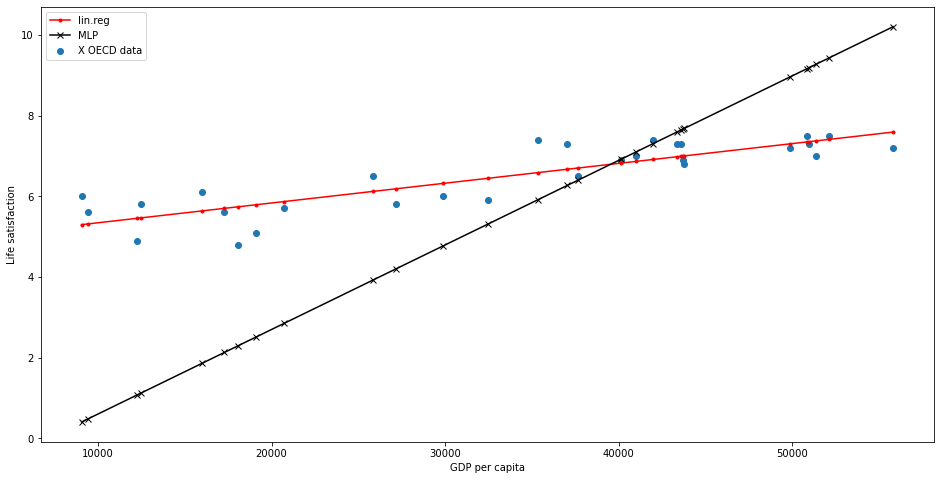

In [6]:
# Setup the MLP and lin. regression again..

def isNumpyData(t: np.ndarray, expected_ndim: int):
    assert isinstance(expected_ndim, int), f"input parameter 'expected_ndim' is not an integer but a '{type(expected_ndim)}'"
    assert expected_ndim>=0, f"expected input parameter 'expected_ndim' to be >=0, got {expected_ndim}"
    if t is None:
        print("input parameter 't' is None", file=sys.stderr)
        return False
    if not isinstance(t, np.ndarray):
        print("excepted numpy.ndarray got type '{type(t)}'", file=sys.stderr)
        return False
    if not t.ndim==expected_ndim:
        print("expected ndim={expected_ndim} but found {t.ndim}", file=sys.stderr)
        return False
    return True

def PlotModels(model1, model2, X: np.ndarray, y: np.ndarray, name_model1: str, name_model2: str):
    
    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model, X: np.ndarray, y: np.ndarray,):
        assert isNumpyData(X, 2) and isNumpyData(y, 1) and X.shape[0]==y.shape[0]
        y_pred_model = model.predict(X)
        score_model = r2_score(y, y_pred_model) # call r2
        return y_pred_model, score_model    

    assert isinstance(name_model1, str) and isinstance(name_model2, str)

    y_pred_model1, score_model1 = CalcPredAndScore(model1, X, y)
    y_pred_model2, score_model2 = CalcPredAndScore(model2, X, y)

    plt.figure(figsize=(16,8))

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{(name_model1).rjust(l)}.score(X, y)={score_model1:0.2f}")
    print(f"{(name_model2).rjust(l)}.score(X, y)={score_model2:0.2f}")

# lets make a linear and MLP regressor and redo the plots
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y, "lin.reg", "MLP")
print("\nOK")

### Qa) Create a Min/max scaler for the MLP

Now, the neurons in neural networks normally expect input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range then the neuron will saturate to its min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. Af fix to the problem in Qd), from `intro.ipynb`, is to preprocess data by scaling it down to something more sensible.

Try to manually scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

(If you already made exercise "Qe) Neural Network with pre-scaling" in L01, then reuse Your work here!) 

Iteration 1, loss = 15.98678111
Iteration 2, loss = 15.96561528
Iteration 3, loss = 15.94441516
Iteration 4, loss = 15.92318030
Iteration 5, loss = 15.90191022
Iteration 6, loss = 15.88055156
Iteration 7, loss = 15.85914856
Iteration 8, loss = 15.83770661
Iteration 9, loss = 15.81622564
Iteration 10, loss = 15.79460955
Iteration 11, loss = 15.77284364
Iteration 12, loss = 15.75101347
Iteration 13, loss = 15.72908433
Iteration 14, loss = 15.70698327
Iteration 15, loss = 15.68482782
Iteration 16, loss = 15.66261989
Iteration 17, loss = 15.64020842
Iteration 18, loss = 15.61770407
Iteration 19, loss = 15.59514108
Iteration 20, loss = 15.57252164
Iteration 21, loss = 15.54980063
Iteration 22, loss = 15.52680040
Iteration 23, loss = 15.50327471
Iteration 24, loss = 15.47961754
Iteration 25, loss = 15.45587224
Iteration 26, loss = 15.43204528
Iteration 27, loss = 15.40814204
Iteration 28, loss = 15.38416703
Iteration 29, loss = 15.36010920
Iteration 30, loss = 15.33592830
Iteration 31, loss 

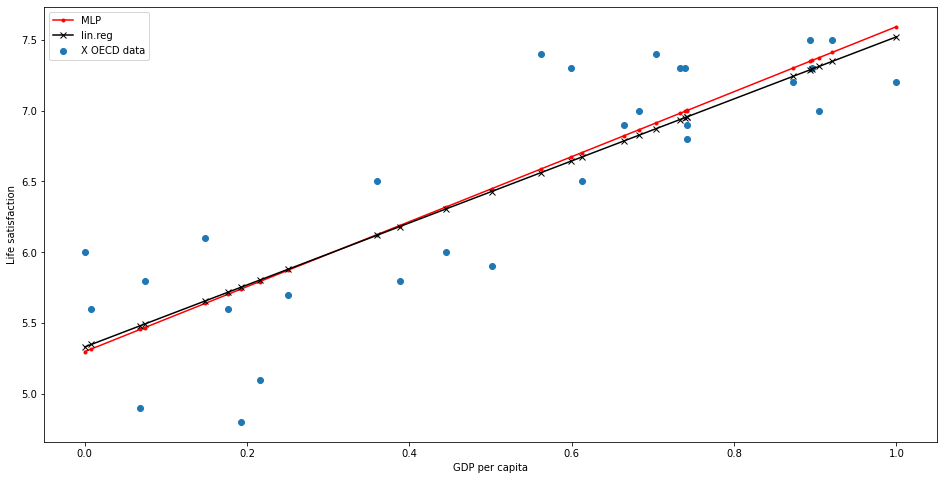

In [7]:
# TODO: add your code here..

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# X transformation
min_max_scaler = MinMaxScaler([0,1])
X_new = min_max_scaler.fit_transform(X)

mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X_new, y.ravel())

# create an test matrix M, with the same dimensionality as X, and in the range [0;1] 
# and a step size of your choice
m=np.linspace(0, 1, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# Prediction
pred = [[22000]]
mlp_pred = mlp.predict(pred)

# New linear regression
linregLMMS = LinearRegression()

linregLMMS.fit(X_new, y)

PlotModels(linregLMMS, mlp, X_new, y, "MLP","lin.reg")



### Qb) Scikit-learn Pipelines

Now, rescale again, but use the `sklearn.preprocessing.MinMaxScaler`.

When this works put both the MLP and the scaler into a composite construction via `sklearn.pipeline.Pipeline`. This composite is just a new Scikit-learn estimator, and can be used just like any other `fit-predict` models, try it, and document it for the journal.

(You could reuse the `PlotModels()` function by also retraining the linear regressor on the scaled data, or just write your own plot code.)

Iteration 1, loss = 21.55346614
Iteration 2, loss = 21.51888011
Iteration 3, loss = 21.48429893
Iteration 4, loss = 21.44972275
Iteration 5, loss = 21.41518286
Iteration 6, loss = 21.38074966
Iteration 7, loss = 21.34632469
Iteration 8, loss = 21.31190664
Iteration 9, loss = 21.27750214
Iteration 10, loss = 21.24314038
Iteration 11, loss = 21.20875185
Iteration 12, loss = 21.17433422
Iteration 13, loss = 21.13989634
Iteration 14, loss = 21.10545780
Iteration 15, loss = 21.07100838
Iteration 16, loss = 21.03652420
Iteration 17, loss = 21.00203731
Iteration 18, loss = 20.96748065
Iteration 19, loss = 20.93286686
Iteration 20, loss = 20.89817980
Iteration 21, loss = 20.86346279
Iteration 22, loss = 20.82872783
Iteration 23, loss = 20.79392781
Iteration 24, loss = 20.75906394
Iteration 25, loss = 20.72417247
Iteration 26, loss = 20.68926183
Iteration 27, loss = 20.65432809
Iteration 28, loss = 20.61931827
Iteration 29, loss = 20.58431177
Iteration 30, loss = 20.54937037
Iteration 31, loss 

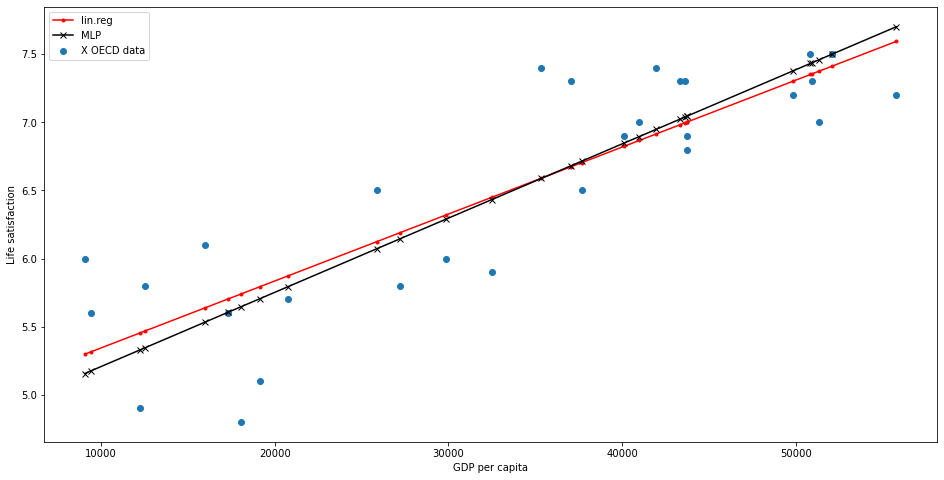

In [8]:
# TODO: add your code here..

from sklearn.pipeline import Pipeline

pipeLIN = Pipeline([
    ('scaler',MinMaxScaler()),
    ('linreg', LinearRegression()),
])


mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)

pipeMLP = Pipeline([
    ('scaler',MinMaxScaler()),
    ('linreg', mlp),
])

pipeLIN.fit(X,y)
pipeMLP.fit(X,y)


PlotModels(pipeLIN, pipeMLP, X, y, "lin.reg", "MLP")

### Qc) Outliers and the Min-max Scaler vs. the Standard Scaler

Explain the fundamental problem with a min-max scaler and outliers. 
According to the documentation, the min-max scaler doesnt reduce the effect of outliers, it, however, scales all the "inliers" into a very narrow range, since the minimum value corresponds to the smallest outlier, and the maximum to the largest outliers. This can compress the "inliers" into a very small/narrow range, meaning the model still has to deal with "bad" values in the lower and upper limit.

Will a `sklearn.preprocessing.StandardScaler` do better here, in the case of abnormal feature values/outliers?

(Written BEFORE making a standardscaler)

It might, since it removes the mean, and only scales the data to its variance. This means that after the scaling, the empirical mean and deviation wont represent the "true" mean and deviation. This might make it unable to balance its scales correctly, or it could make it more accurate within the range. 

(Written AFTER making a standardscaler)

It seems as if the MLP model with the standardscaler does handle the outliers in the data well, since it enables the MLP to more accurately fit the data (reflected in the higher $R^2$ score). Since the StandardScaler scales to unit variance, we see that the fit becomes non-linear in the lower GDP section, since there is a large "clump" of data with relative higher variance that the "clump" the in higher GDP range.

Iteration 1, loss = 21.10488662
Iteration 2, loss = 21.06499097
Iteration 3, loss = 21.02510947
Iteration 4, loss = 20.98524253
Iteration 5, loss = 20.94539056
Iteration 6, loss = 20.90555395
Iteration 7, loss = 20.86573305
Iteration 8, loss = 20.82592817
Iteration 9, loss = 20.78613961
Iteration 10, loss = 20.74636764
Iteration 11, loss = 20.70661249
Iteration 12, loss = 20.66688632
Iteration 13, loss = 20.62717913
Iteration 14, loss = 20.58748915
Iteration 15, loss = 20.54781631
Iteration 16, loss = 20.50816056
Iteration 17, loss = 20.46852185
Iteration 18, loss = 20.42890010
Iteration 19, loss = 20.38929522
Iteration 20, loss = 20.34970712
Iteration 21, loss = 20.31013566
Iteration 22, loss = 20.27058069
Iteration 23, loss = 20.23104204
Iteration 24, loss = 20.19151951
Iteration 25, loss = 20.15201287
Iteration 26, loss = 20.11252188
Iteration 27, loss = 20.07304625
Iteration 28, loss = 20.03358569
Iteration 29, loss = 19.99413985
Iteration 30, loss = 19.95470838
Iteration 31, loss 

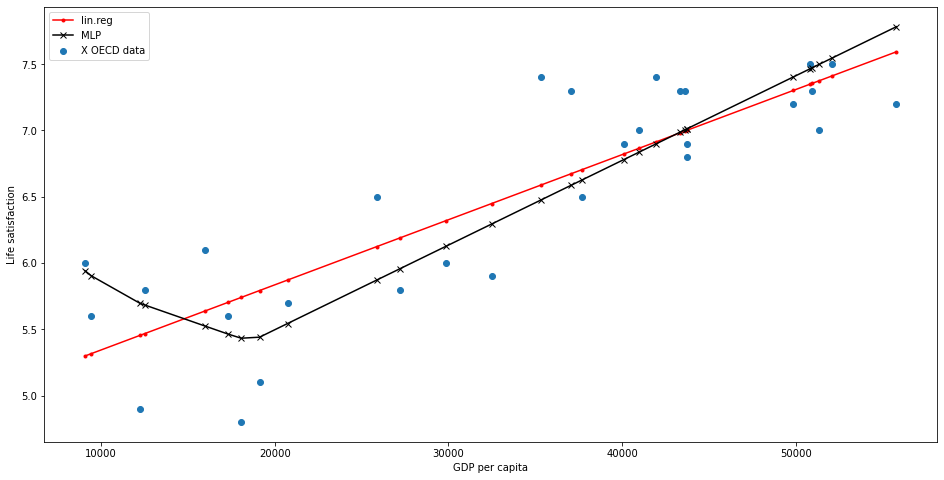

In [10]:
# TODO: research the problem here..

pipeLINSS = Pipeline([
    ('scaler',StandardScaler()),
    ('linreg', LinearRegression()),
])


mlpSS = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)

pipeMLPSS = Pipeline([
    ('scaler',StandardScaler()),
    ('linreg', mlpSS),
])

pipeLINSS.fit(X,y)
pipeMLPSS.fit(X,y)


PlotModels(pipeLINSS, pipeMLPSS, X, y, "lin.reg", "MLP")

### Qd) Modify the MLP Hyperparameters

Finally, try out some of the hyperparameters associated with the MLP.

Specifically, test how few neurons the MLP can do with---still producing a sensible output, i.e. high $R^2$. 

Also try-out some other activation functions, ala sigmoid, and solvers, like `sgd`.

Notice, that the Scikit-learn MLP does not have as many adjustable parameters, as a Keras MLP, for example, the Scikit-learn MLP misses neurons initialization parameters (p.333-334 [HOML,2nd], p.358-359 [HOML,3rd]) and the ELU activation function (p.336 [HOML,2nd], p.363 [HOML,3rd).

[OPTIONAL 1]: use a Keras MLP regressor instead of the Scikit-learn MLP (You need to install the  Keras if its not installed as default).

[OPTIONAL 2]: try out the `early_stopping` hyperparameter on the `MLPRegressor`. 

[OPTIONAL 3]: try putting all score-calculations into K-fold cross-validation  methods readily available in Scikit-learn using

* `sklearn.model_selection.cross_val_predict`
* `sklearn.model_selection.cross_val_score` 

or similar (this is, in theory, the correct method, but can be hard to use due to the  extremely small number of data points, `n=29`).

0.7338336090737427

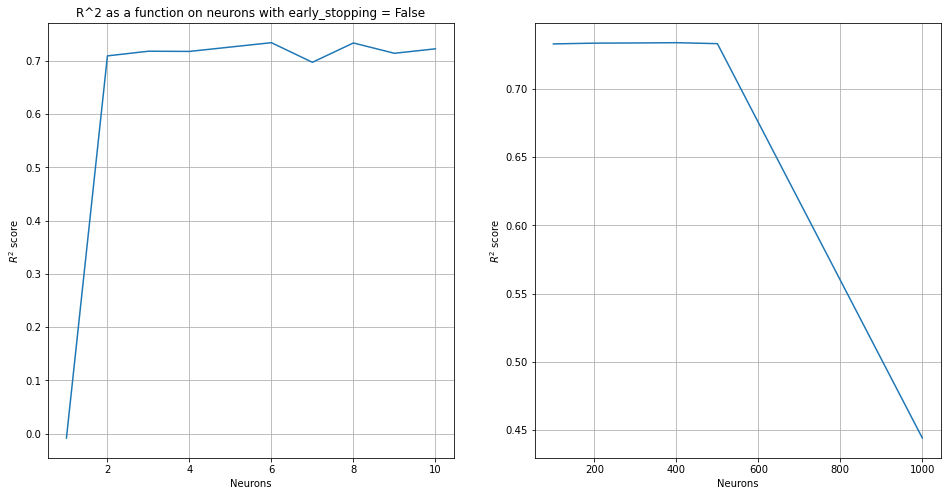

In [11]:
# TODO: add your code here..
# Stolen function
def CalcPredAndScore(model, X: np.ndarray, y: np.ndarray,):
        assert isNumpyData(X, 2) and isNumpyData(y, 1) and X.shape[0]==y.shape[0]
        y_pred_model = model.predict(X)
        score_model = r2_score(y, y_pred_model) # call r2
        return score_model

Neurons = [1,2,3,4,5,6,7,8,9,10,100,200,300,400,500,1000]

MLPScores = []

for Neuron in Neurons:
    mlp = MLPRegressor( hidden_layer_sizes=(Neuron,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False, early_stopping=False)

    pipeMLP = Pipeline([
        ('scaler', MinMaxScaler()),
        ('linreg', mlp),
    ])


    pipeMLP.fit(X,y)

    MLPScores.append(CalcPredAndScore(pipeMLP, X, y))


plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
plt.plot(Neurons[:10], MLPScores[:10])
plt.title("R^2 as a function on neurons with early_stopping = False")
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
plt.subplot(1,2,2)
plt.plot(Neurons[10:], MLPScores[10:])
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
np.max(MLPScores)



0.7341417234805537

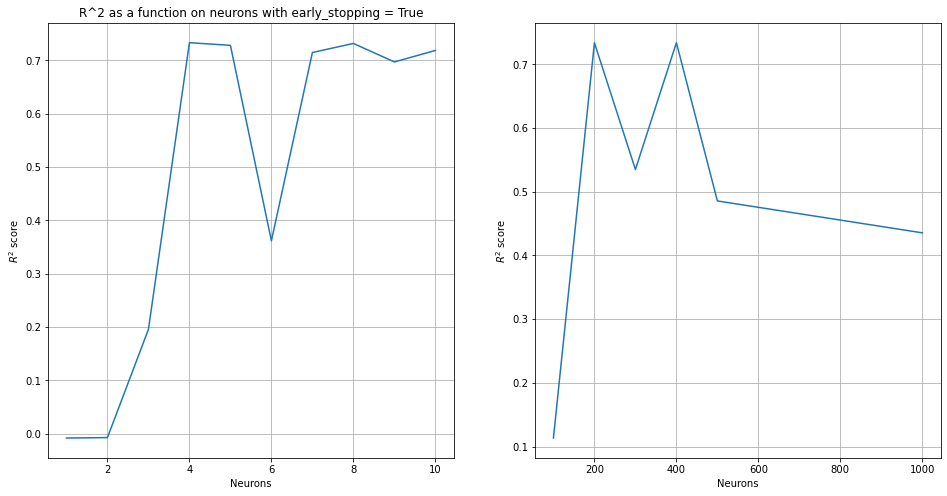

In [15]:
Neurons = [1,2,3,4,5,6,7,8,9,10,100,200,300,400,500,1000]

MLPScores = []
BVS = []

for Neuron in Neurons:
    mlp = MLPRegressor( hidden_layer_sizes=(Neuron,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=False, early_stopping=True)

    pipeMLP = Pipeline([
        ('scaler', MinMaxScaler()),
        ('linreg', mlp),
    ])


    pipeMLP.fit(X,y)

    MLPScores.append(CalcPredAndScore(pipeMLP, X, y))


plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
plt.plot(Neurons[:10], MLPScores[:10])
plt.title("R^2 as a function on neurons with early_stopping = True")
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
plt.subplot(1,2,2)
plt.plot(Neurons[10:], MLPScores[10:])
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
np.max(MLPScores)

 Sigmoid function

0.7280666563988131

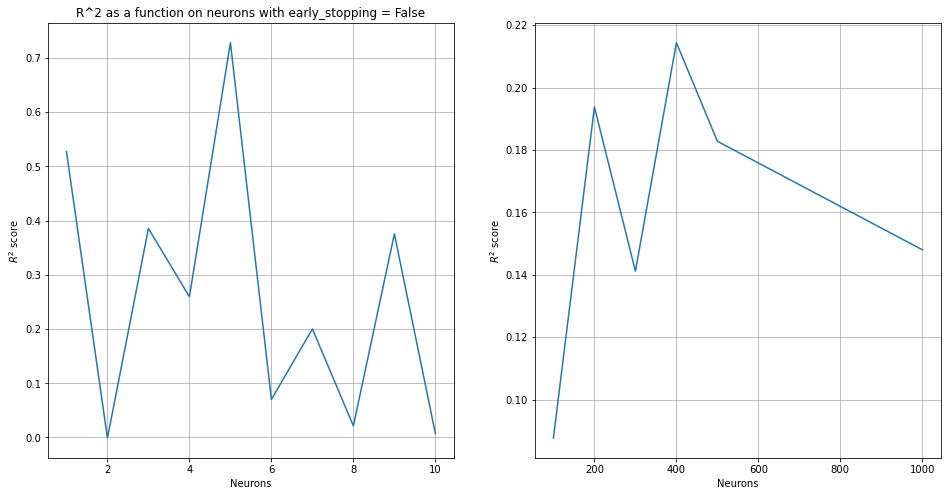

In [28]:
Neurons = [1,2,3,4,5,6,7,8,9,10,100,200,300,400,500,1000]

MLPScoresSGD = []

for Neuron in Neurons:
    mlp = MLPRegressor( hidden_layer_sizes=(Neuron,), solver='sgd', activation='relu', tol=1E-5, max_iter=100000, verbose=False, early_stopping=False)

    pipeMLP = Pipeline([
        ('scaler', MinMaxScaler()),
        ('linreg', mlp),
    ])


    pipeMLP.fit(X,y)

    MLPScoresSGD.append(CalcPredAndScore(pipeMLP, X, y))

plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
plt.plot(Neurons[:10], MLPScoresSGD[:10])
plt.title("R^2 as a function on neurons with early_stopping = False")
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
plt.subplot(1,2,2)
plt.plot(Neurons[10:], MLPScoresSGD[10:])
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
np.max(MLPScores)

np.max(MLPScoresSGD)




0.7307052644813922

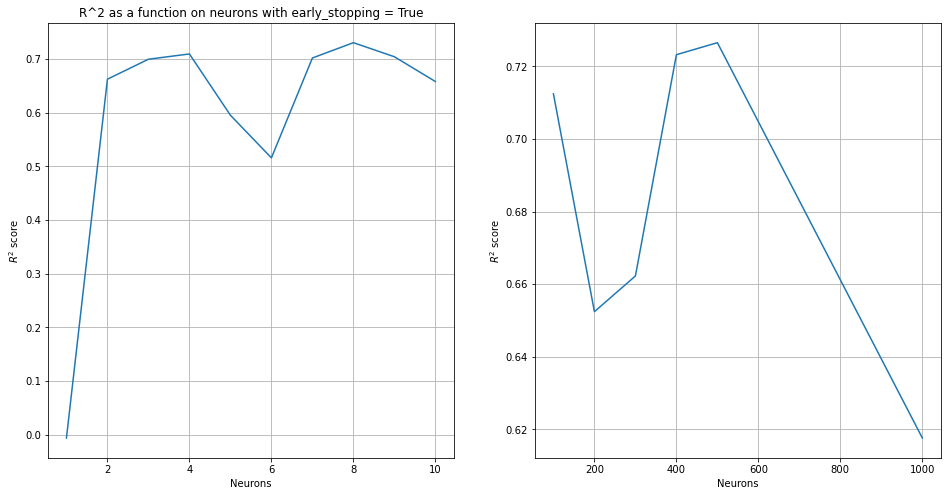

In [29]:
Neurons = [1,2,3,4,5,6,7,8,9,10,100,200,300,400,500,1000]

MLPScoresSGD = []

for Neuron in Neurons:
    mlp = MLPRegressor( hidden_layer_sizes=(Neuron,), solver='sgd', activation='relu', tol=1E-5, max_iter=100000, verbose=False, early_stopping=True)

    pipeMLP = Pipeline([
        ('scaler', MinMaxScaler()),
        ('linreg', mlp),
    ])


    pipeMLP.fit(X,y)

    MLPScoresSGD.append(CalcPredAndScore(pipeMLP, X, y))

plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
plt.plot(Neurons[:10], MLPScoresSGD[:10])
plt.title("R^2 as a function on neurons with early_stopping = True")
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
plt.subplot(1,2,2)
plt.plot(Neurons[10:], MLPScoresSGD[10:])
plt.xlabel("Neurons")
plt.ylabel("$R^2$ score")
plt.grid()
np.max(MLPScores)

np.max(MLPScoresSGD)

REVISIONS||
:-|:-|
2020-10-15| CEF, initial. 
2020-10-21| CEF, added Standard Scaler Q.
2020-11-17| CEF, removed orhpant text in Qa (moded to Qc).
2021-02-10| CEF, updated for ITMAL F21.
2021-11-08| CEF, updated print info.
2021-02-10| CEF, updated for SWMAL F22.
2023-02-19| CEF, updated for SWMAL F23, adjuste page numbers for 3rd.ed.
2023-02-21| CEF, added types, rewrote CalcPredAndScore and added isNumpyData.